In [1]:
import pandas as pd
import nltk
import regex as re
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/data_usa_cleaned.csv")

In [3]:
data.shape

(84080, 4)

In [4]:
data['content'][5]

'@BillsShout38 @AfternoonDawg @philklotzbach I love when everyone beats the global warming drum each year because it’s really hot in August.'

# Data Exploration

In [5]:
# checking duplicates if there are retweets
data['content'].duplicated().sum()


1327

In [6]:
# dropping duplicate tweets based on Text coloumn
data = data.drop_duplicates(subset=['content'], keep='first')

In [7]:
data.shape

(82753, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82753 entries, 0 to 84079
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  82753 non-null  object
 1   place    82753 non-null  object
 2   year     82753 non-null  int64 
 3   month    82753 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


# Text preprocessing

In [9]:
# converting text into lower case
data['content'] = data['content'].str.lower()

In [10]:
# removing twitter mentions(@, #, punctuations) from the tweets
data['content'] = data['content'].str.replace("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", '', regex = True)

In [11]:
# removing hyperlinks from the tweets
data['content'] = data['content'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',regex = True)

In [12]:
data['content'][4]

'its not global warming its global cooling thats whats going to kill your grandmother and when everyone understands that perfectly well a lot of things are going to happenenergy shortages in europe are a preview of the green new deal future  '

In [13]:
# emoji removal
data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,content,place,year,month
0,global warming means moresevere floods and hur...,usa,2022,August
1,gadol so much for global warming lttgtlt,usa,2022,August
2,marshes ponds and meadows soak up water when i...,usa,2022,August
3,all that parkland helps protect millions of am...,usa,2022,August
4,its not global warming its global cooling that...,usa,2022,August
...,...,...,...,...
84071,csus dean professor take heat for global warmi...,usa,2010,March
84072,more proof global warming is a lie,usa,2010,March
84077,i am helping my friend who doez not have very ...,usa,2010,March
84078,panic mode must move nowhere to go also my co...,usa,2010,March


In [14]:
data['content'][3]

'all that parkland helps protect millions of americans from the effects of global warming pools and splash pads offer a place to cool off on dangerously hot days trees provide shade pull carbon dioxide out of the air and even lower temps '

In [15]:
#tweets_combined.to_csv("combine_tweet_2019_2022(with_stopwords).csv",index = False)

In [16]:
# removing stopwords using ntlk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop = (stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# adding stop words to the existing list
new_stopwords = ["isnt", "dont", "maam", "according", "u", "climate change", "global warming", "know","climate", "change", "warming","global","say", "go", "use", "said", "warmingchange", "warmingclimate","changeglobal","warming change", "thats","us", "see","via","may"]
stop.extend(new_stopwords)

In [18]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# removing stopwords
data['content']  = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [20]:
data.head()

,content,place,year,month
0,means moresevere floods hurricanes damage park...,usa,2022,August
1,gadol much lttgtlt,usa,2022,August
2,marshes ponds meadows soak water rains help ke...,usa,2022,August
3,parkland helps protect millions americans effe...,usa,2022,August
4,cooling whats going kill grandmother everyone ...,usa,2022,August


In [21]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
data['content_token'] = data['content'].apply(word_tokenize)

In [23]:
data

,content,place,year,month,content_token
0,means moresevere floods hurricanes damage park...,usa,2022,August,"[means, moresevere, floods, hurricanes, damage..."
1,gadol much lttgtlt,usa,2022,August,"[gadol, much, lttgtlt]"
2,marshes ponds meadows soak water rains help ke...,usa,2022,August,"[marshes, ponds, meadows, soak, water, rains, ..."
3,parkland helps protect millions americans effe...,usa,2022,August,"[parkland, helps, protect, millions, americans..."
4,cooling whats going kill grandmother everyone ...,usa,2022,August,"[cooling, whats, going, kill, grandmother, eve..."
...,...,...,...,...,...
84071,csus dean professor take heat study sacramento...,usa,2010,March,"[csus, dean, professor, take, heat, study, sac..."
84072,proof lie,usa,2010,March,"[proof, lie]"
84077,helping friend doez good english correct essay,usa,2010,March,"[helping, friend, doez, good, english, correct..."
84078,panic mode must move nowhere also coffee got c...,usa,2010,March,"[panic, mode, must, move, nowhere, also, coffe..."


In [24]:
data.to_csv("data_usa_cleaned_tokenized.csv", index = False)

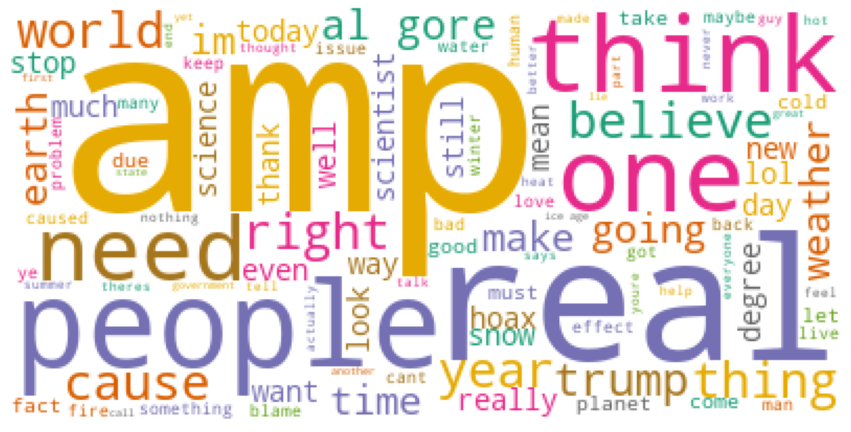

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(data['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud

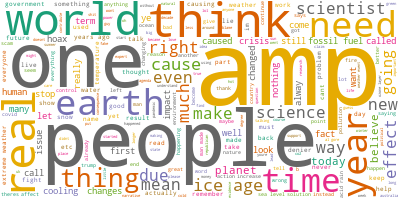

In [466]:
wordcloud.to_image()